In [141]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [142]:
original_data = pd.read_csv("http://users.jyu.fi/~olkhriye/ties4911/demos/demo1/Automobile_price_data_Raw_set.csv")
print(original_data.head())

   symboling  normalized-losses         make fuel-type aspiration  \
0          3                NaN  alfa-romero       gas        std   
1          3                NaN  alfa-romero       gas        std   
2          1                NaN  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68       

In [53]:
original_data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [42]:
print("\033[1mDiscovering Null Values\033[0m")
display(original_data.isnull().sum())
print("\033[1m\nFeatures Data Types\033[0m")
display(original_data.dtypes)

Discovering Null Values


symboling             0
normalized-losses    41
make                  4
fuel-type             1
aspiration            1
num-of-doors          2
body-style            1
drive-wheels          0
engine-location       1
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


Features Data Types


symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [143]:
print("\033[1mDropping Null Values\033[0m")
original_data = original_data.dropna()
print(original_data.isnull().sum())

Dropping Null Values
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [144]:
features = ['body-style', 'wheel-base', 'engine-size', 'horsepower', 'peak-rpm', 'highway-mpg', 'price']
data = original_data[features]
data.head()

,body-style,wheel-base,engine-size,horsepower,peak-rpm,highway-mpg,price
3,sedan,99.8,109,102.0,5500.0,30,13950.0
4,sedan,99.4,136,115.0,5500.0,22,17450.0
6,sedan,105.8,136,110.0,5500.0,25,17710.0
8,sedan,105.8,131,140.0,5500.0,20,23875.0
10,sedan,101.2,108,101.0,5800.0,29,16430.0


In [56]:
data.shape

(153, 7)

In [145]:
target = 'make'
y = original_data[target]
y

3       audi
4       audi
6       audi
8       audi
10       bmw
       ...  
200    volvo
201    volvo
202    volvo
203    volvo
204    volvo
Name: make, Length: 153, dtype: object

In [58]:
data.dtypes

body-style      object
wheel-base     float64
engine-size      int64
horsepower     float64
peak-rpm       float64
highway-mpg      int64
price          float64
dtype: object

In [70]:
data['body-style'].nunique()

5

In [71]:
unique_values = data['body-style'].unique()
unique_values

array(['sedan', 'hatchback', 'wagon', 'convertible', 'hardtop'],
      dtype=object)

In [72]:
data['body-style']

3      sedan
4      sedan
6      sedan
8      sedan
10     sedan
       ...  
200    sedan
201    sedan
202    sedan
203    sedan
204    sedan
Name: body-style, Length: 153, dtype: object

In [119]:
row = original_data.iloc[18]
row

symboling                    2
normalized-losses        137.0
make                     honda
fuel-type                  gas
aspiration                 std
num-of-doors               two
body-style           hatchback
drive-wheels               fwd
engine-location          front
wheel-base                86.6
length                   144.6
width                     63.9
height                    50.8
curb-weight               1713
engine-type                ohc
num-of-cylinders          four
engine-size                 92
fuel-system               1bbl
bore                      2.91
stroke                    3.41
compression-ratio          9.6
horsepower                58.0
peak-rpm                4800.0
city-mpg                    49
highway-mpg                 54
price                   6479.0
Name: 30, dtype: object

In [146]:
print("\033[1mOne Hot Encoding for body-style\033[0m")
# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop=None)

# Fit and transform the 'body-style' column
data_encoded = encoder.fit_transform(data['body-style'].values.reshape(-1, 1))
data_encoded = pd.DataFrame(data_encoded)
data_encoded

One Hot Encoding for body-style


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
148,0.0,0.0,0.0,1.0,0.0
149,0.0,0.0,0.0,1.0,0.0
150,0.0,0.0,0.0,1.0,0.0
151,0.0,0.0,0.0,1.0,0.0


In [147]:
data = data.drop('body-style', axis=1)
data_encoded = pd.concat([data.reset_index(drop=True), data_encoded], axis=1)
data_encoded

,wheel-base,engine-size,horsepower,peak-rpm,highway-mpg,price,0,1,2,3,4
0,99.8,109,102.0,5500.0,30,13950.0,0.0,0.0,0.0,1.0,0.0
1,99.4,136,115.0,5500.0,22,17450.0,0.0,0.0,0.0,1.0,0.0
2,105.8,136,110.0,5500.0,25,17710.0,0.0,0.0,0.0,1.0,0.0
3,105.8,131,140.0,5500.0,20,23875.0,0.0,0.0,0.0,1.0,0.0
4,101.2,108,101.0,5800.0,29,16430.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
148,109.1,141,114.0,5400.0,28,16845.0,0.0,0.0,0.0,1.0,0.0
149,109.1,141,160.0,5300.0,25,19045.0,0.0,0.0,0.0,1.0,0.0
150,109.1,173,134.0,5500.0,23,21485.0,0.0,0.0,0.0,1.0,0.0
151,109.1,145,106.0,4800.0,27,22470.0,0.0,0.0,0.0,1.0,0.0


**Inference:** The shape was saved, 153 rows x 11 columns

In [121]:
row2 = data_encoded.iloc[18]
row2

wheel-base       86.6
engine-size      92.0
horsepower       58.0
peak-rpm       4800.0
highway-mpg      54.0
price          6479.0
0                 0.0
1                 0.0
2                 1.0
3                 0.0
4                 0.0
Name: 18, dtype: float64

In [93]:
y.nunique()

18

In [114]:
data_unique_values = original_data['body-style'].unique()
data_unique_values

array(['sedan', 'hatchback', 'wagon', 'convertible', 'hardtop'],
      dtype=object)

In [148]:
print("\033[1mOne Hot Encoding for make\033[0m")
# Fit and transform the 'body-style' column
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))
y_encoded = pd.DataFrame(y_encoded)
y_encoded

One Hot Encoding for make


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [149]:
X_train, X_test, Y_train, Y_test = train_test_split(data_encoded, y_encoded, test_size=0.2, random_state=5)

In [95]:
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("Y_train Shape:", Y_train.shape)
print("Y_test Shape:", Y_test.shape)

X_train Shape: (122, 11)
X_test Shape: (31, 11)
Y_train Shape: (122, 18)
Y_test Shape: (31, 18)


In [150]:
scaler = RobustScaler()

# Convert feature names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Y_train_scaled = scaler.fit_transform(Y_train)
Y_test_scaled = scaler.transform(Y_test)

print("Scaled training data shape:", X_train_scaled.shape)
print("Scaled training data shape:", X_test_scaled.shape)
print("Scaled training data shape:", Y_train_scaled.shape)
print("Scaled training data shape:", Y_test_scaled.shape)

Scaled training data shape: (122, 11)
Scaled training data shape: (31, 11)
Scaled training data shape: (122, 18)
Scaled training data shape: (31, 18)


In [151]:
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(Y_test_scaled.shape[1], activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [152]:
history = model.fit(X_train_scaled, Y_train_scaled, batch_size=256, epochs=500, validation_split=0.2, verbose=1)

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 2.8979 - accuracy: 0.0206 - val_loss: 2.8817 - val_accuracy: 0.0800
Epoch 2/500
1/1 [==============================] - 0s 60ms/step - loss: 2.8513 - accuracy: 0.0722 - val_loss: 2.8599 - val_accuracy: 0.1200
Epoch 3/500
1/1 [==============================] - 0s 44ms/step - loss: 2.8186 - accuracy: 0.1237 - val_loss: 2.8380 - val_accuracy: 0.2000
Epoch 4/500
1/1 [==============================] - 0s 42ms/step - loss: 2.8379 - accuracy: 0.0619 - val_loss: 2.8166 - val_accuracy: 0.1600
Epoch 5/500
1/1 [==============================] - 0s 44ms/step - loss: 2.8093 - accuracy: 0.1649 - val_loss: 2.7944 - val_accuracy: 0.3200
Epoch 6/500
1/1 [==============================] - 0s 47ms/step - loss: 2.7839 - accuracy: 0.1340 - val_loss: 2.7733 - val_accuracy: 0.3200
Epoch 7/500
1/1 [==============================] - 0s 59ms/step - loss: 2.7473 - accuracy: 0.1649 - val_loss: 2.7527 - val_accuracy: 0.3600
Epoch 8/500
1/1 [=====

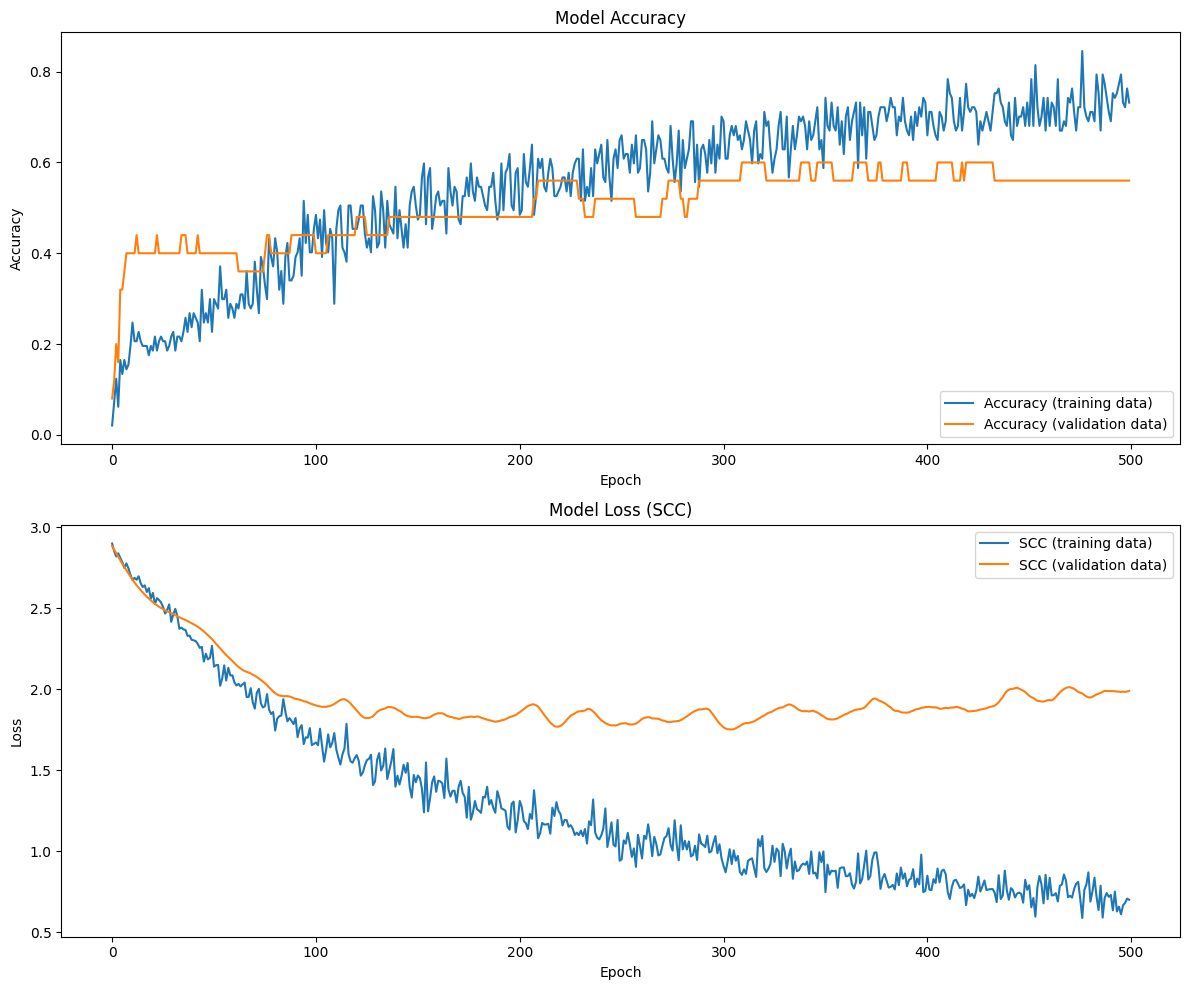

In [153]:
plt.figure(figsize=(12, 10))

# Plot training & validation accuracy values
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="lower right")

# Plot training & validation loss values
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='SCC (training data)')
plt.plot(history.history['val_loss'], label='SCC (validation data)')
plt.title('Model Loss (SCC)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

In [154]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, Y_test_scaled, verbose=1)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

1/1 [==============================] - 0s 28ms/step - loss: 1.6913 - accuracy: 0.5484
Test Loss: 1.6912716627120972
Test Accuracy: 0.5483871102333069


In [107]:
samples = np.array([
    [103.5, 164, 121, 4250, 25, 24565, 'sedan'],
    [86.6, 92, 58, 4800, 54, 6479, 'hatchback']
])

In [155]:
samples_encoded = np.array([
    [103.5, 164, 121, 4250, 25, 24565, 0.0,	0.0, 0.0,	1.0, 0.0], #sedan
    [86.6, 92, 58, 4800, 54, 6479, 0.0,	0.0, 1.0, 0.0, 0.0] #hatchback
])

In [156]:
# Extracting feature names and data from samples
feature_names = X_train.columns
print(feature_names)
sample_data = pd.DataFrame(samples_encoded, columns=feature_names)
sample_data

Index(['wheel-base', 'engine-size', 'horsepower', 'peak-rpm', 'highway-mpg',
       'price', '0', '1', '2', '3', '4'],
      dtype='object')


,wheel-base,engine-size,horsepower,peak-rpm,highway-mpg,price,0,1,2,3,4
0,103.5,164.0,121.0,4250.0,25.0,24565.0,0.0,0.0,0.0,1.0,0.0
1,86.6,92.0,58.0,4800.0,54.0,6479.0,0.0,0.0,1.0,0.0,0.0


In [157]:
scaler2 = RobustScaler()
# Convert feature names to strings
sample_data.columns = sample_data.columns.astype(str)

# Scale the input samples using the same scaler
scaled_samples = scaler2.fit_transform(sample_data)
print(sample_data.shape)

# Make predictions using the trained model
predictions = model.predict(scaled_samples)
print(predictions.shape)

# Inverse transform the predictions to get them back to the original scale
#predicted_values = scaler2.inverse_transform(predictions)

print("Predicted values:")
print(np.round(predictions))

(2, 11)
1/1 [==============================] - 0s 78ms/step
(2, 18)
Predicted values:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


**Inference:**

*First prediction:* **Nissan:** 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.

*Second prediction:* **Honda:**  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.